# Principal Component Analysis - A Deep Dive into Principal Component Analysis and its Linear Algebra Foundations

**Principal Component Analysis (PCA)** is a statistical method that has gained substantial importance in fields such as machine learning, data analysis, and signal processing. In essence, PCA is a dimensionality reduction technique that transforms large sets of variables into a smaller one, preserving as much of the original data’s variance as possible. Behind the curtains, PCA is deeply rooted in linear algebra concepts. Let's unravel this mathematical magic.

## What is PCA?
Before we delve into the linear algebra behind PCA, let's understand what PCA is aiming to achieve. When we deal with high-dimensional data, it becomes challenging to visualize and interpret. PCA aims to simplify this data by reducing its dimensions while retaining the essence of its variation.

Imagine you have data points scattered in a three-dimensional space. Instead of viewing it in 3D, you might want to represent it on a 2D plane (like a piece of paper). In doing so, you'd want to ensure the 2D representation captures the main patterns or variations in the original 3D data. This is essentially what PCA helps with.


## Linear Algebra Concepts Behind PCA

**Vectors and Eigenvalues/Vectors:**

- Vectors form the foundation. In PCA, data is treated as vectors in a high-dimensional space.
- Eigenvalues and Eigenvectors are core to PCA. An eigenvector of a matrix is a non-zero vector such that when the matrix multiplies the vector, the output is a scaled version of the same vector. The scaling factor is the eigenvalue. In PCA, eigenvectors point in the direction of the largest variance, and their corresponding eigenvalues indicate the magnitude of this variance.

**Covariance Matrix:**

- Variance measures how much a set of data varies, and covariance measures how two data sets move together. The covariance matrix for a data set is a matrix where the entry at position (i,j) is the covariance between the i-th and j-th elements of the data. It captures the relationships between different dimensions of your data.

**Matrix Factorization:**

- PCA can be seen as a factorization of the data matrix. This means breaking down a matrix into multiple other matrices that, when multiplied together, reproduce the original matrix. One of the ways to achieve this is the Singular Value Decomposition (SVD).

## Steps to Perform PCA Using Linear Algebra

**1. Standardize the Data:**

- Before PCA, it's essential to standardize the data, meaning each feature should have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the analysis.

**2. Compute the Covariance Matrix:**

- With standardized data, calculate the covariance matrix to capture the relationships between features.

**3. Calculate Eigenvectors and Eigenvalues:**

- Decompose the covariance matrix to get its eigenvectors and eigenvalues. These eigenvectors represent the principal components of the data.

**4. Sort Eigenvectors by Eigenvalues:**

- The eigenvector with the highest eigenvalue represents the most significant principal component, and so on.

**5. Transform Original Data:**

- Multiply the standardized data by the selected (top) eigenvectors to transform it into the reduced-dimensional space.

## Uses of PCA

- **Visualization**: Reducing dimensions makes it easier to visualize data.

- **Noise Reduction**: By keeping only the significant principal components (those with larger eigenvalues), we can filter out noise.

- **Efficiency**: Less data means faster processing and less storage

In [6]:
!pip3 uninstall -y tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0


In [7]:
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [10]:
!pip3 uninstall -y scipy
!pip3 install scipy

Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Successfully uninstalled scipy-1.7.3
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.3 MB 22.8 MB/s eta 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.22.4 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.13.1 which is incompatible.
pymc 5.3.1 requires arviz>=0.13.0, but you have arviz 0.12.1 which is incompatible.
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


Let's look at the process of implementing PCA on the Iris dataset using Python and deep into the linear algebra concepts behind each step.

## 1. Loading the Data:

First, we'll load the Iris dataset:

In [1]:
from sklearn.datasets import load_iris
import numpy as np

data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

## 2. Standardizing the Data:

PCA is affected by the scales of the features. Hence, we standardize:

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [4]:
X.shape

(150, 4)

In [18]:
X_std[0].mean()

-0.6343369099891769

In [21]:
X_std.mean()

-1.4684549872375404e-15

### Linear Algebra Concept:

Standardizing ensures that each feature has a mean of 0 and a standard deviation of 1. This ensures that no feature artificially dominates the variance.

## 3. Compute the Covariance Matrix:

In [22]:
cov_matrix = np.cov(X_std.T)

In [23]:
cov_matrix.shape

(4, 4)

### Linear Algebra Concept:

The covariance matrix captures the relationships between features. It represents how features vary together.

## 4. Calculate Eigenvectors and Eigenvalues:

In [24]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

### Linear Algebra Concept:

Eigenvalues represent the magnitude of variance in the direction of their corresponding eigenvectors. Eigenvectors represent the directions of maximum variance. The largest eigenvalue's corresponding eigenvector will be the first principal component.

## 5. Sort Eigenvectors by Eigenvalues:

To decide the order of principal components:

In [25]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
eigenvalues_sorted = eigenvalues[sorted_indices]

## 6. Select Principal Components:
    
For simplicity, let's choose the top 2 principal components:

In [26]:
num_components = 2
top_eigenvectors = eigenvectors_sorted[:, :num_components]

## 7. Transform Original Data:

Now, we'll transform the data to the new subspace:

In [32]:
X_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [31]:
top_eigenvectors

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [27]:
X_pca = X_std.dot(top_eigenvectors)
X_pca.shape

(150, 2)

### Linear Algebra Concept:

The above dot product operation reduces the dimensionality of our data. This transformed data now contains most of the variance in the dataset along fewer dimensions, making it easier to visualize and process.

## 8. Visualize:

Let's visualize the 2D PCA results:

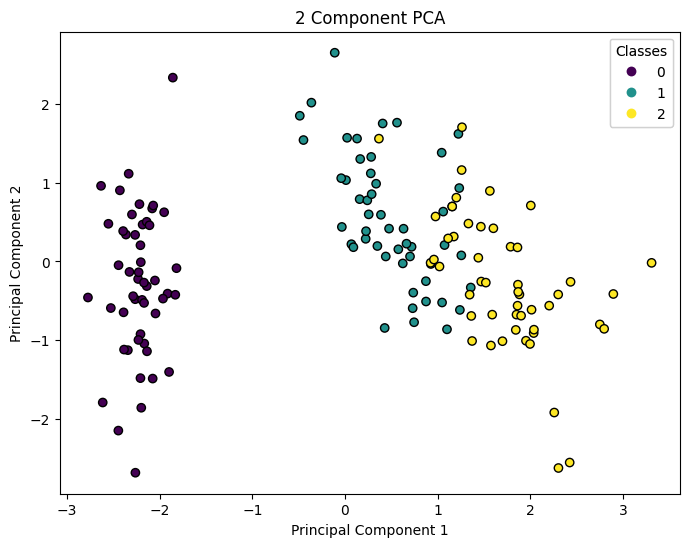

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)
plt.show()

The above visualization will show a scatter plot where the different classes of the Iris dataset are distinguished in a 2D plane formed by the top 2 principal components.

## Conclusion

While the methodology behind PCA may seem complex, its foundation in linear algebra provides a robust and systematic approach for dimensionality reduction. Understanding these underlying concepts is crucial for those looking to master data analysis, as it offers a window into the mechanics of many advanced algorithms and techniques.

By harnessing the power of vectors, matrices, and their properties, PCA gives us the tools to simplify complex datasets, making them more understandable, visualizable, and manageable. So the next time you're faced with a high-dimensional dataset, remember the magic of PCA and the linear algebra that makes it possible!